In [1]:
import pandas as pd
#This file is generated by calling 1000 times the command python fairnessAppServer.py --timesteps 20 --testmode --hypothesis 100
#Hypothesis 100 simulates random answer selection for a test
f = open("Data/test1000.txt","r")
all_lines = f.readlines()

In [2]:
acc = []
fd = []
fn = []
dp = []
max_for_user = []

In [3]:
for i in range(0, len(all_lines)):
    #Extract all lines showing probabilities for timestep 20.  
    if("Probabilities after t = 19" in all_lines[i]):
        acc.append(float(all_lines[i+1].split()[3]))
        fd.append(float(all_lines[i+2].split()[4]))
        fn.append(float(all_lines[i+3].split()[4]))
        dp.append(float(all_lines[i+4].split()[4]))
        max_for_user.append(max(float(all_lines[i+1].split()[3]), float(all_lines[i+2].split()[4]), float(all_lines[i+3].split()[4]), float(all_lines[i+4].split()[4])))      

In [4]:
probs_df = pd.DataFrame({'Equal Accuracy':acc, 'Equal False Discovery':fd, 'Equal False Negative':fn, 'Equal Demographic Parity':dp})
#Save to CSV File
probs_df.to_csv("Data/randomAnswer_1000runs.csv")

Generating Plots

In [5]:
import numpy as np
import matplotlib.pyplot as plt

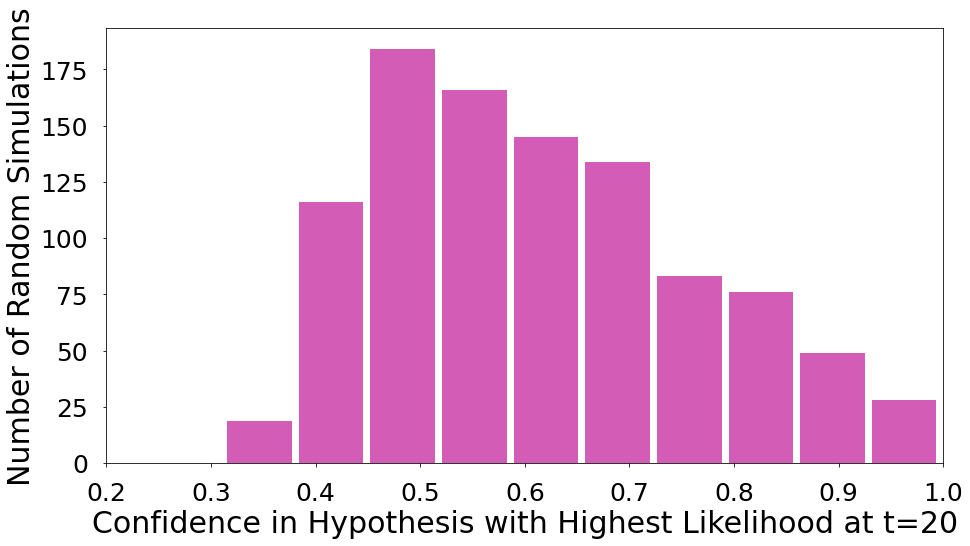

In [7]:
fig = plt.figure(figsize=(15,8))
plt.hist(max_for_user, bins=10, align='mid', rwidth=.9, color="#d35db6")
plt.ylabel("Number of Random Simulations", fontsize=30)
plt.xlabel("Confidence in Hypothesis with Highest Likelihood at t=20", fontsize=30)
plt.xlim((0.2,1))
plt.tick_params(axis='both', which='major', labelsize=25, pad=15)
plt.savefig('Plots/baseline_confidence.pdf')
plt.show()

In [8]:
acc = np.array(acc)
fd = np.array(fd)
fn = np.array(fn)
dp = np.array(dp)
acc_avg = np.mean(acc)
fd_avg = np.mean(fd)
fn_avg = np.mean(fn)
dp_avg = np.mean(dp)
acc_std = np.std(acc)
fd_std= np.std(fd)
fn_std = np.std(fn)
dp_std = np.std(dp)
metrics = ["EP", "FDP", "FNP", "DP"]
x_pos = np.arange(4)
CTEs = [acc_avg, fd_avg, fn_avg, dp_avg]
error = [acc_std, fd_std, fn_std, dp_std]

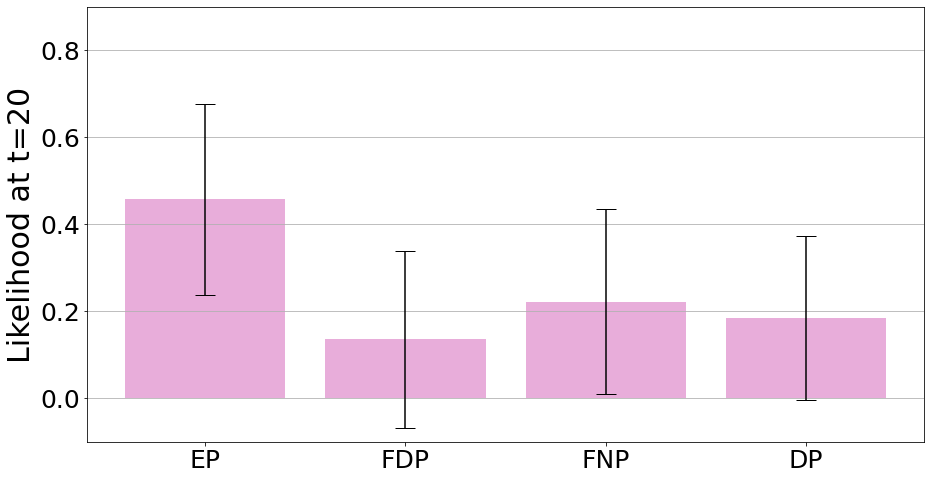

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color='#d35db6')
ax.set_ylabel('Likelihood at t=20', fontsize=30)
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=30)
ax.set_ylim(np.arange(-0.1, 1))
#ax.set_title('Average Probability at t=20 Across 1000 Random Simulations', fontsize=30)
ax.yaxis.grid(True)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig('Plots/baseline_barplot.pdf')
plt.show()